In [19]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import io

In [25]:
# Step 2: Upload the dataset
uploaded = files.upload()

Saving data.csv to data.csv


In [26]:
#Load the dataset
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [27]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [28]:
# Check for missing values
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [29]:
# Check data types
data.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [30]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Data Visualization

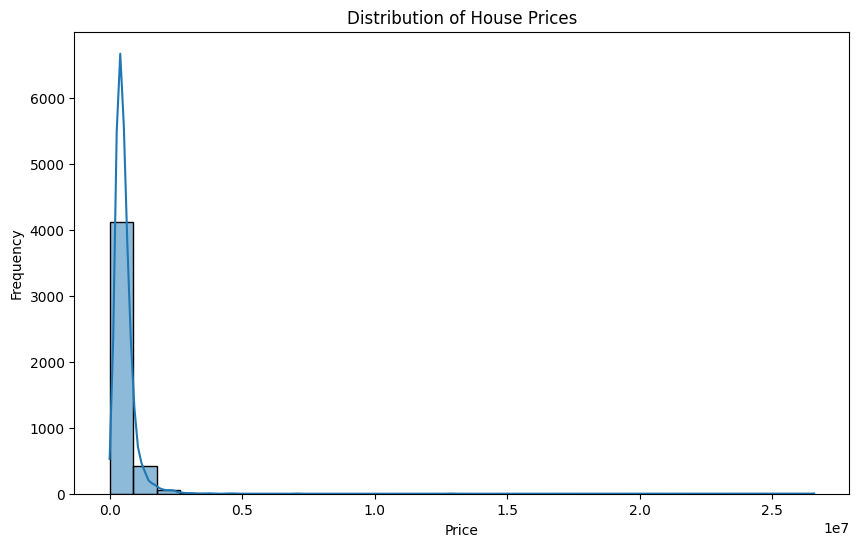

In [31]:
# Distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

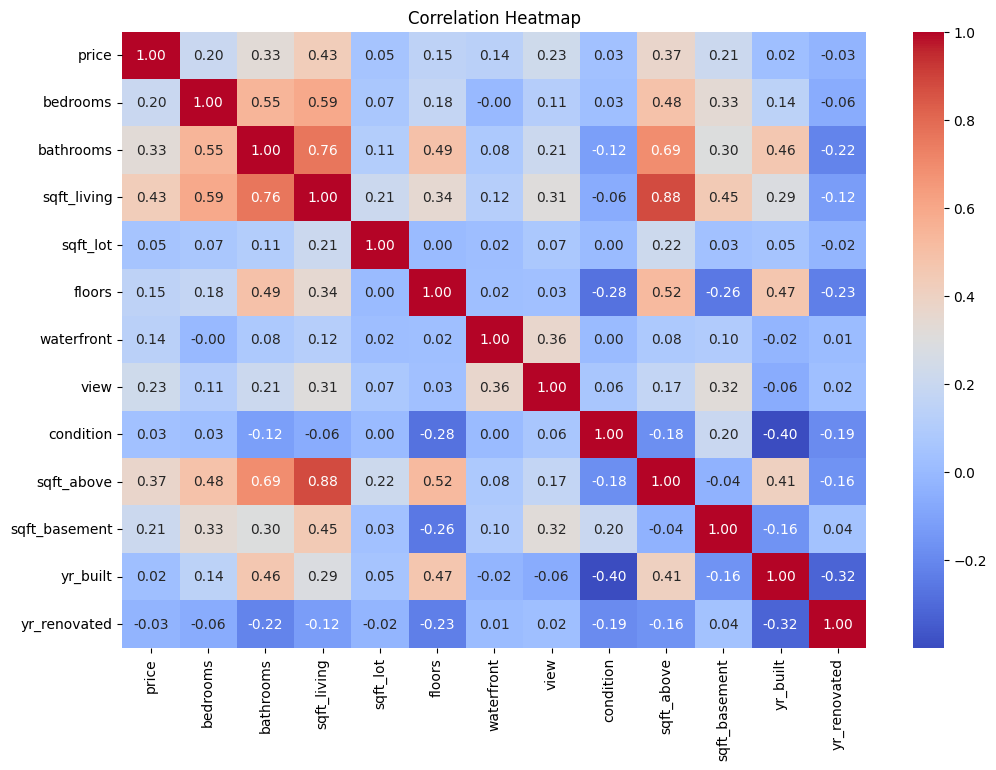

In [32]:
# Compute correlation matrix for numeric features only
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
#  Data Preprocessing
data.dropna(axis=1, thresh=len(data)*0.7, inplace=True)

# Select numeric columns before filling missing values
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data.fillna(numeric_data.median(), inplace=True)

# Update the original DataFrame with the imputed values
data[numeric_data.columns] = numeric_data

data = pd.get_dummies(data, drop_first=True)

In [38]:
#  Define Features and Target
X = data.drop(columns=['price'])  # Assuming 'SalePrice' is the target variable
y = data['price']

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Make Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [43]:
#  Evaluate the Model
print(f"Train R^2 Score: {r2_score(y_train, y_pred_train)}")
print(f"Test R^2 Score: {r2_score(y_test, y_pred_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

Train R^2 Score: 0.9469039489880203
Test R^2 Score: 0.04851726338995266
Mean Absolute Error: 156973.28543343415
Root Mean Squared Error: 985071.6657115241


In [44]:
#  Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [45]:
# Print the feature ranking
print("Feature ranking:")
for i in range(10):  # Show top 10 features
    print(f"{i + 1}. {X.columns[indices[i]]} ({importances[indices[i]]})")


Feature ranking:
1. sqft_living (0.4980015054849758)
2. yr_built (0.04422529884998312)
3. sqft_above (0.035884164819748)
4. sqft_basement (0.03096798685635679)
5. statezip_WA 98004 (0.029692176416430353)
6. sqft_lot (0.02421229338411735)
7. view (0.023841925655390166)
8. city_Seattle (0.021791009372215717)
9. bathrooms (0.016342408409273698)
10. city_Bellevue (0.01448324675312835)
